In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from coffea import util
from coffea.processor import accumulate
import os
import re
import pandas as pd
import hist
import matplotlib as mpl
import mplhep
import sys

sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils

See here: https://cms-analysis.docs.cern.ch/guidelines/plotting/colors/ for plot styling suggestions from PubComm

## Import coffea files -- signal and background

In [2]:
prefix = './coffea/skimmed/'
suffix = '_VR_collinear_neg_good_vtx_v7_NJetG2'

In [4]:
# Signal
sig_histo = util.load(f'{prefix}/signal{suffix}.coffea')[0]

In [3]:
# Background
bkg_histo = util.load(f'{prefix}/bkg{suffix}_moreMC.coffea')[0]

In [4]:
# Data
data_histo = util.load(f'{prefix}/data{suffix}.coffea')[0]

In [7]:
utils.get_signal_list_of_histograms(sig_histo)

['sel_e1_pt',
 'sel_e1_eta',
 'sel_e1_phi',
 'sel_e1_dxy',
 'sel_e1_dxySignif',
 'sel_e1_vxy1',
 'sel_e1_vz',
 'sel_e2_pt',
 'sel_e2_eta',
 'sel_e2_phi',
 'sel_e2_dxy',
 'sel_e2_dxySignif',
 'sel_e2_vxy1',
 'sel_e2_vz',
 'sel_vtx_dR',
 'sel_vtx_mindxy',
 'sel_vtx_vxy1',
 'sel_vtx_vxy10',
 'sel_vtx_vxy100',
 'sel_vtx_leadpT',
 'sel_vtx_METdPhi',
 'sel_vtx_mindRj',
 'sel_vtx_chi2',
 'sel_vtx_mass',
 'sel_vtx_mindPhiJ',
 'sel_vtx_sign',
 'sel_vtx_pt',
 'sel_vtx_eta',
 'sel_vtx_phi',
 'sel_vtx_type',
 'sel_vtx_minEleDrJ',
 'sel_vtx_minEleDPhiJ',
 'sel_vtx_mass_low',
 'sel_vtx_mindxy_low',
 'sel_vtx_sign_etaProd',
 'sel_vtx_CosThetaColl',
 'sel_vtx_LxyCosThetaColl',
 'sel_vtx_LxyCosThetaCollZoom',
 'sel_vtx_LxyCosThetaCollZoomZoom',
 'sel_vtx_eleDphi',
 'sel_vtx_maxMiniRelIso',
 'sel_vtx_maxMiniRelIsoCorr',
 'sel_vtx_vx_vs_vy',
 'sel_vtx_phi_vs_METphi',
 'PVx_vs_PVy',
 'PFMET',
 'PFMET1000',
 'PFMETphi',
 'jetMETdPhi',
 'minJetMETdPhi',
 'nJets',
 'lead_jet_pt',
 'lead_jet_eta',
 'jetMETrat

## Plot 1D -- Background

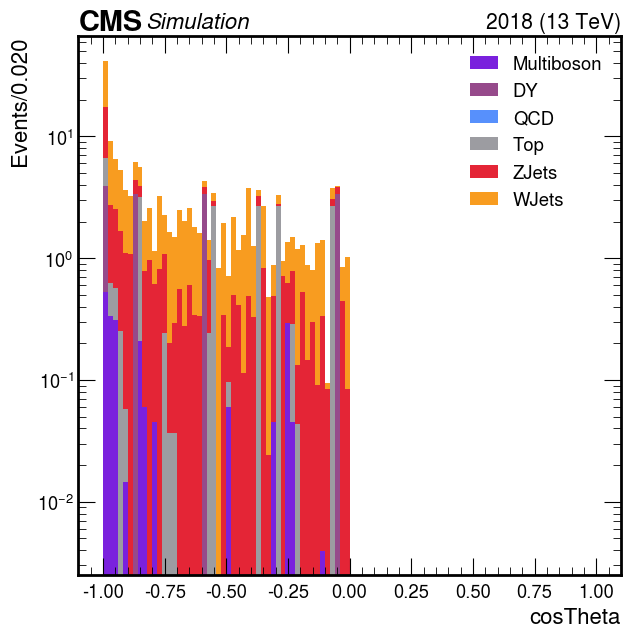

In [149]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': './plots/',
    'outName': f'background_VR_coscollinear.png'
}

# bkg
ptools.plot_bkg_1d(bkg_histo, plot_dict, style_dict, isLegacy = False)


plt.title('')
plt.legend()
plt.show()

## Plot 1D -- Background Stacked to 1D

/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


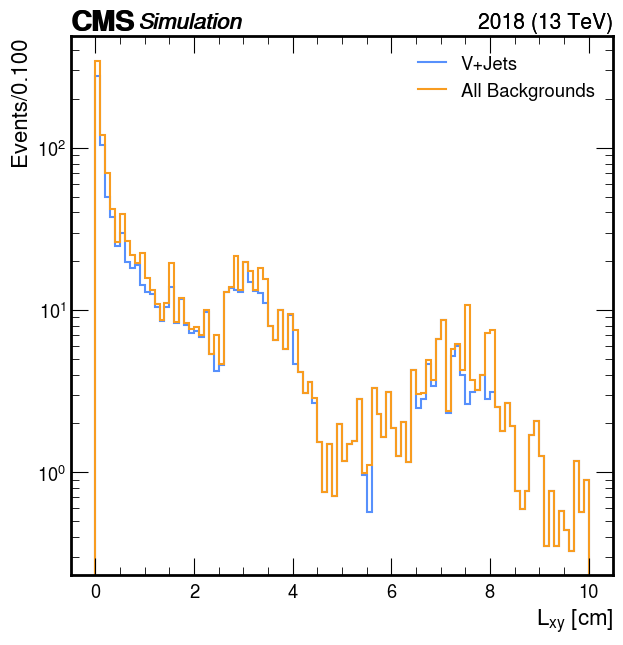

In [98]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': False,
    'outDir': './plots/',
    'outName': f''
}

# bkg
style_dict['label'] = 'V+Jets'
ptools.plot_bkg_1d_stacked(bkg_histo, plot_dict, style_dict,  processes=['WJets','ZJets'])

style_dict['label'] = 'All Backgrounds'
ptools.plot_bkg_1d_stacked(bkg_histo, plot_dict, style_dict, processes='all')

plt.legend()
plt.show()

## Plot 1D -- Signal

Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png


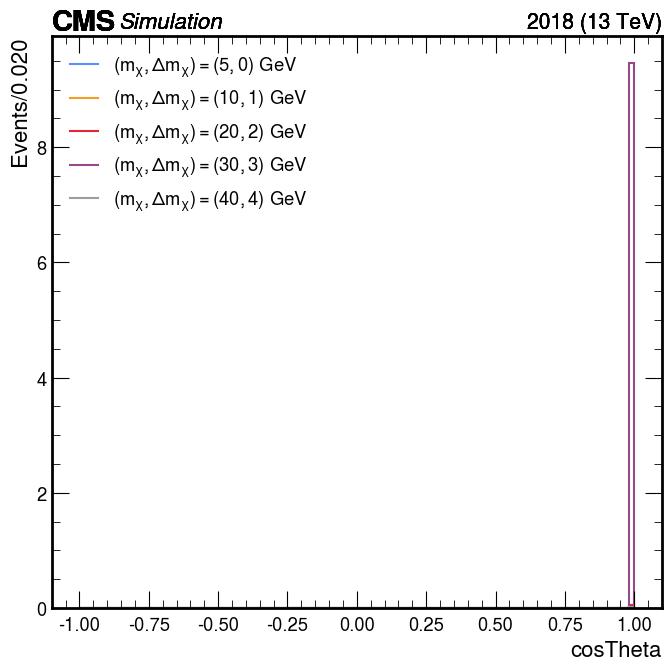

In [42]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m5to40_delta0p1_ctau100.png'
}

# signal points
m1s = [5, 10, 20, 30, 40]
deltas = [0.1]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png


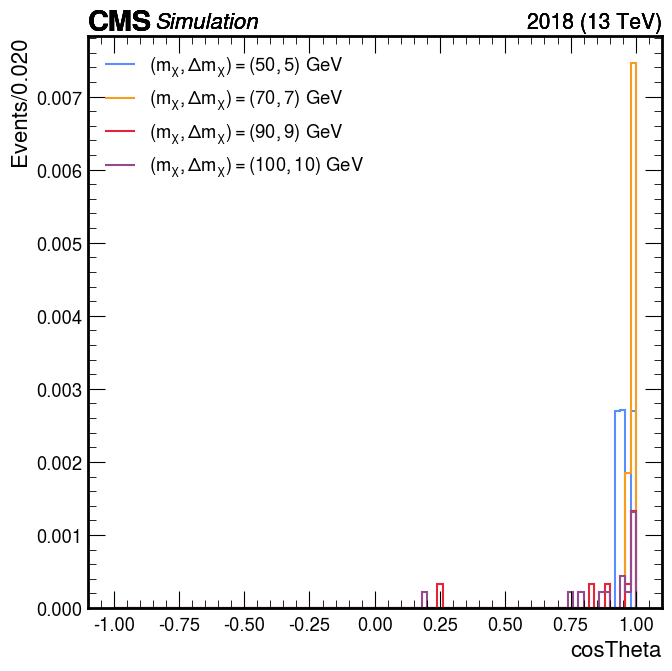

In [43]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m50to100_delta0p1_ctau100.png'
}

# signal points
m1s = [50, 70, 90, 100]
deltas = [0.1]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png


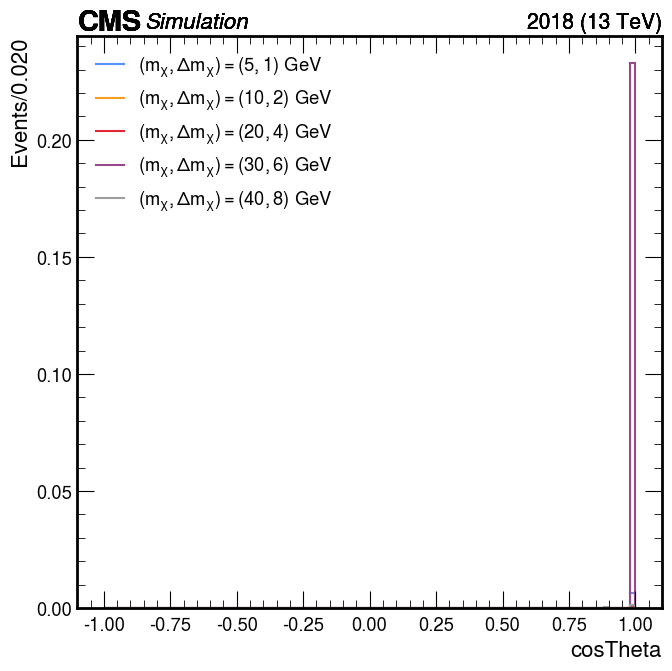

In [44]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m5to40_delta0p2_ctau100.png'
}

# signal points
m1s = [5, 10, 20, 30, 40]
deltas = [0.2]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png
Saved: ./plots//signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png


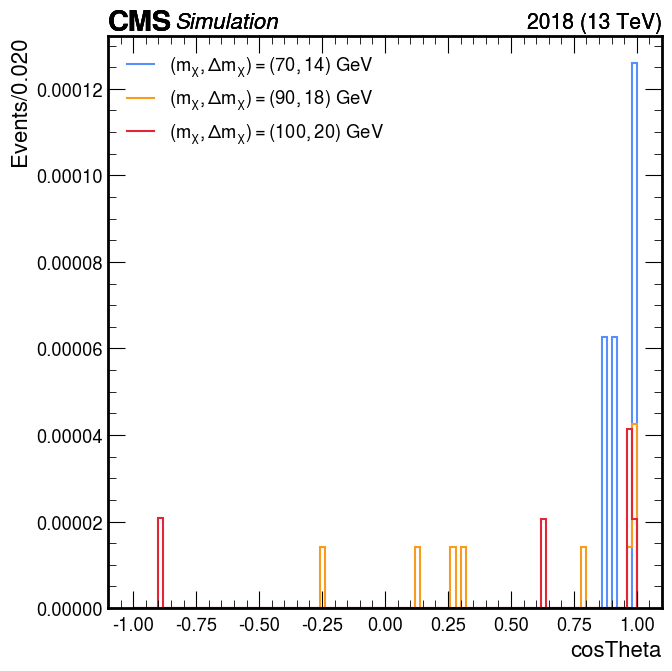

In [45]:
fig, ax = plt.subplots(figsize=(7,7))

# Plot settings
plot_dict = {
    'variable': 'sel_vtx_CosThetaColl',
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': False, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': None,    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut9_coscollinear_m50to100_delta0p2_ctau100.png'
}

# signal points
m1s = [70, 90, 100]
deltas = [0.2]
ctaus = [100]

# Plot for variables signal points
for m1 in m1s:
    for delta in deltas:
        for ctau in ctaus:
            ptools.plot_signal_1D(sig_histo, m1, delta, ctau, plot_dict, style_dict)

## Data and Background

/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_background_nJet.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_background_nJet.png


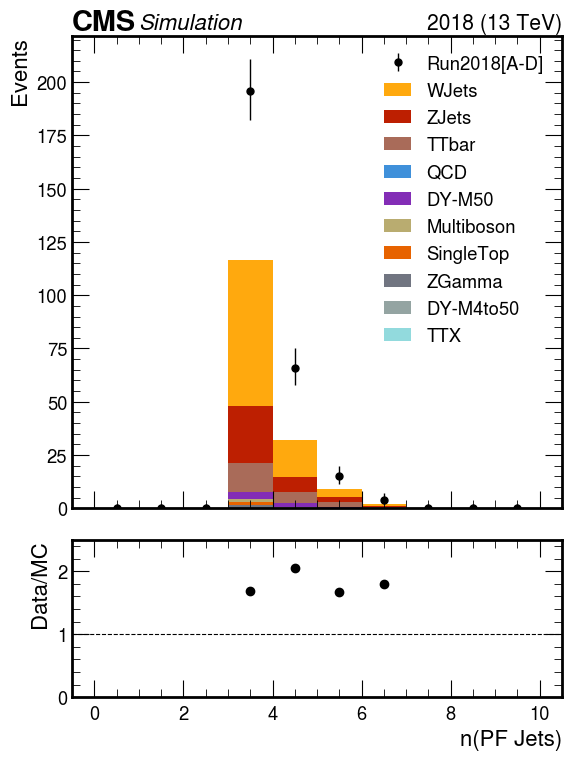

In [5]:
fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': 'nJets',
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'n(PF Jets)',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': 'data_background_nJet.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_mass.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_mass.png


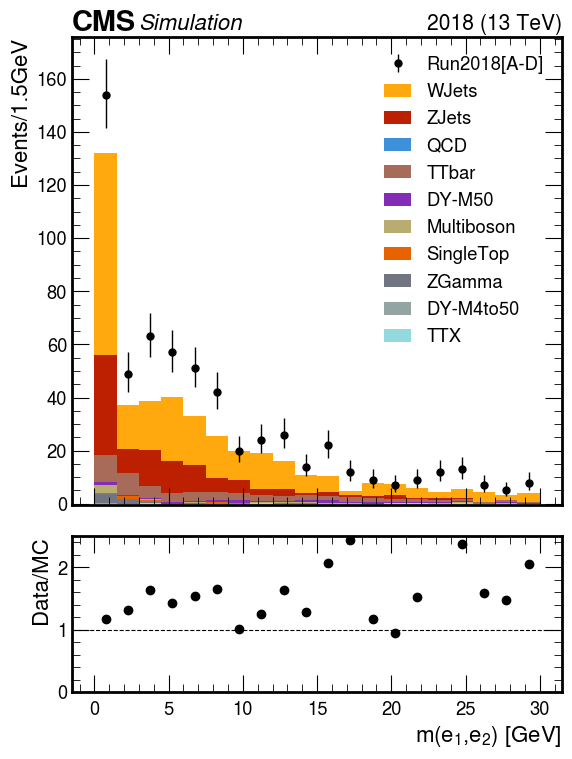

In [80]:
variable = 'sel_vtx_mass'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"m($e_{1}$,$e_{2}$) [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/1.5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_dR.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_dR.png


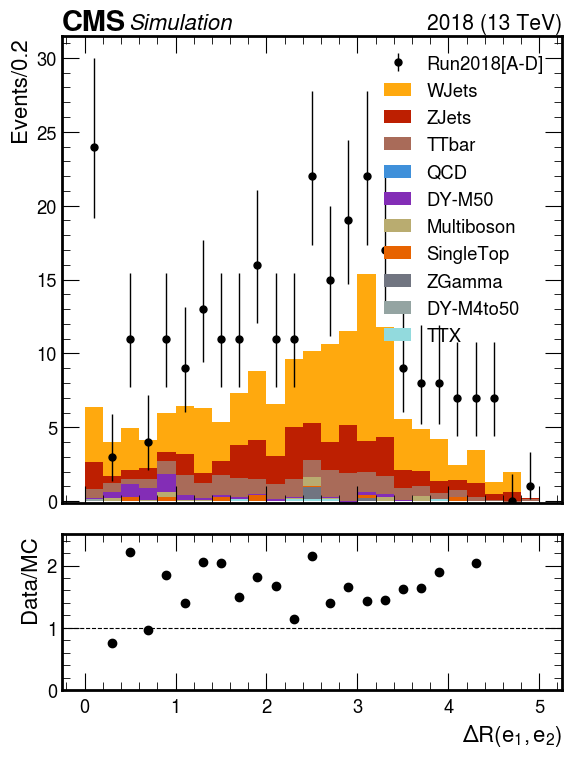

In [7]:
variable = 'sel_vtx_dR'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\Delta$R($e_{1},e_{2}$)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.2',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy.png


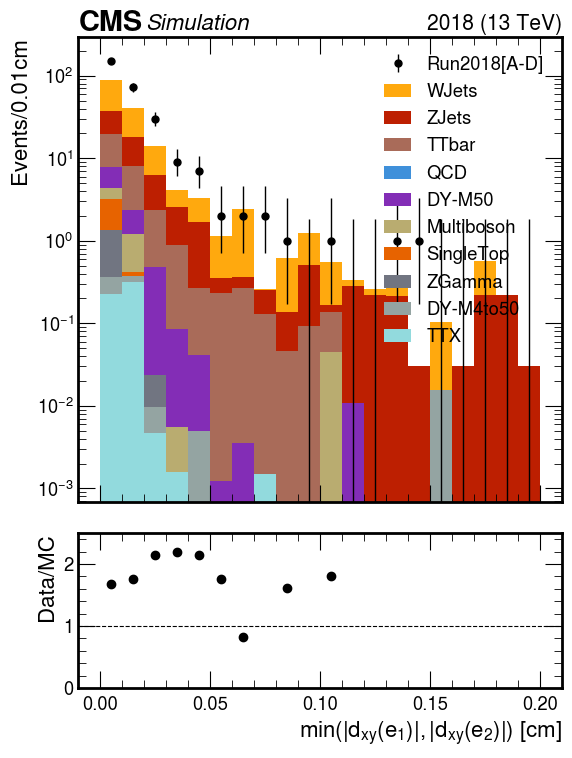

In [8]:
variable = 'sel_vtx_mindxy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"min($|d_{xy}(e_{1})|,|d_{xy}(e_{2})|$) [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.01cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

In [9]:
cut_map = {}

for idx, cut_idx in enumerate(utils.get_signal_list_of_cuts(sig_histo, get_cut_idx = True)):
    cut_map[cut_idx] = utils.get_signal_list_of_cuts(sig_histo)[idx]

print(cut_map)

NameError: name 'sig_histo' is not defined

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/Lxy//data_VR_sel_vtx_vxy1_cut_j1pt_80.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/Lxy//data_VR_sel_vtx_vxy1_cut_j1pt_80.png


'\nfor cut in cut_map.keys():\n    if \'all\' in cut or \'hasVtx\' in cut:\n        continue\n    \n    fig, ax = plt.subplots(figsize=(6,6))\n    \n    style_dict[\'fig\'] = fig\n    style_dict[\'ax\'] = ax\n\n    plot_dict[\'cut\'] = cut\n\n    print(f\'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}\')\n    style_dict[\'outName\'] = f\'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}\'\n    \n    ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)\n'

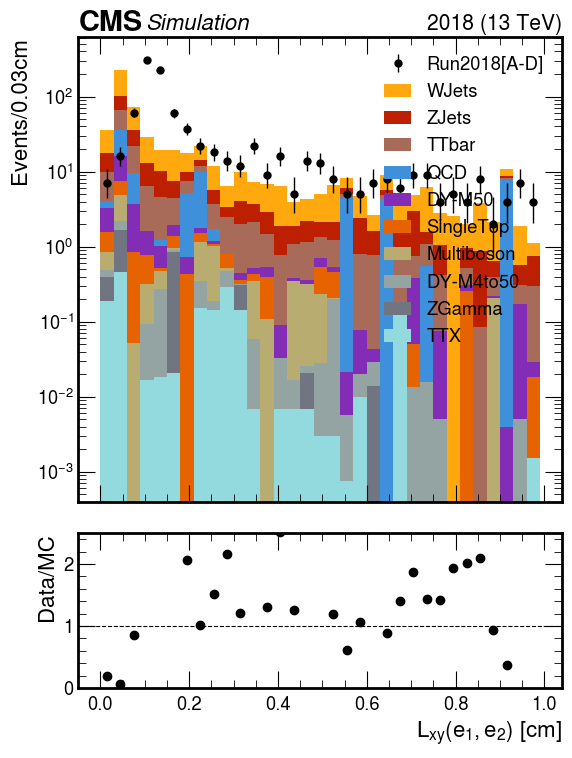

In [10]:
variable = 'sel_vtx_vxy1'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut7',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$L_{xy}(e_{1},e_{2})$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.03cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/Lxy/',
    'outName': f'data_VR_{variable}_cut_j1pt_80.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

'''
for cut in cut_map.keys():
    if 'all' in cut or 'hasVtx' in cut:
        continue
    
    fig, ax = plt.subplots(figsize=(6,6))
    
    style_dict['fig'] = fig
    style_dict['ax'] = ax

    plot_dict['cut'] = cut

    print(f'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}')
    style_dict['outName'] = f'data_VR_{variable}_cut_{cut_map[cut].replace(" ","_")}'
    
    ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)
'''

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_vxy10.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_vxy10.png


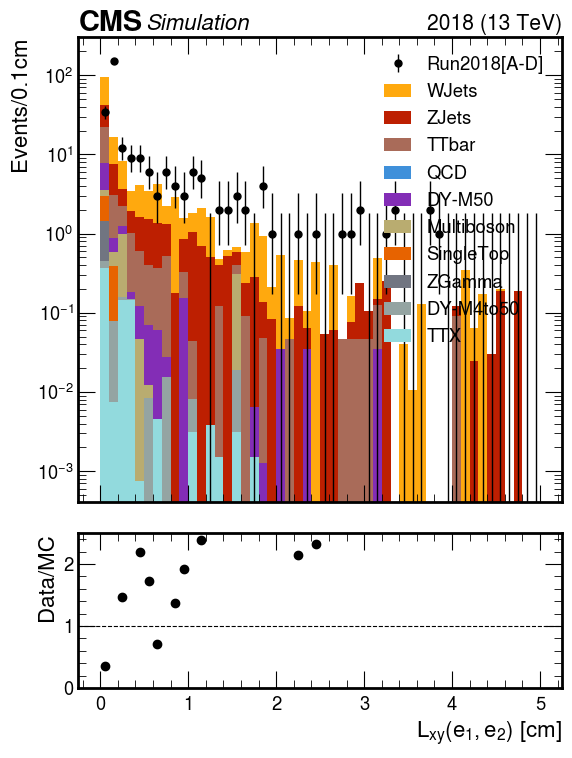

In [11]:
variable = 'sel_vtx_vxy10'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$L_{xy}(e_{1},e_{2})$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.1cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_vxy100.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_vxy100.png


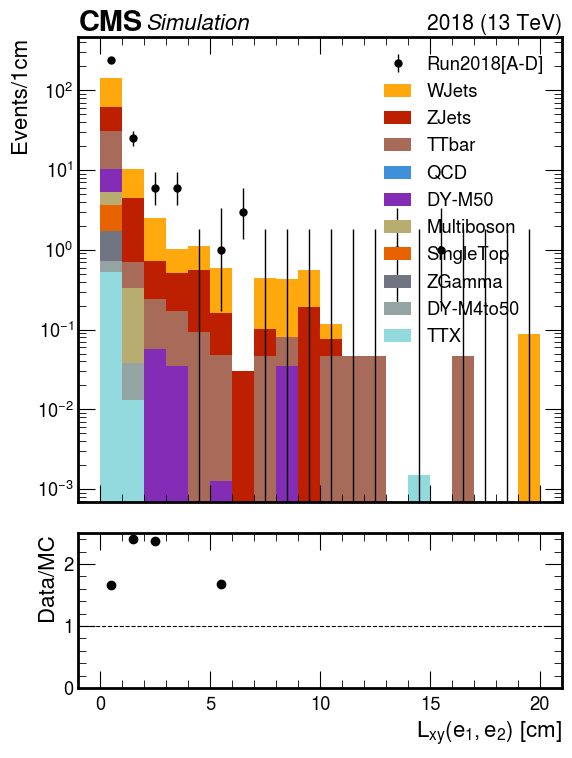

In [12]:
variable = 'sel_vtx_vxy100'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,20],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$L_{xy}(e_{1},e_{2})$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/1cm',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_METdPhi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_METdPhi.png


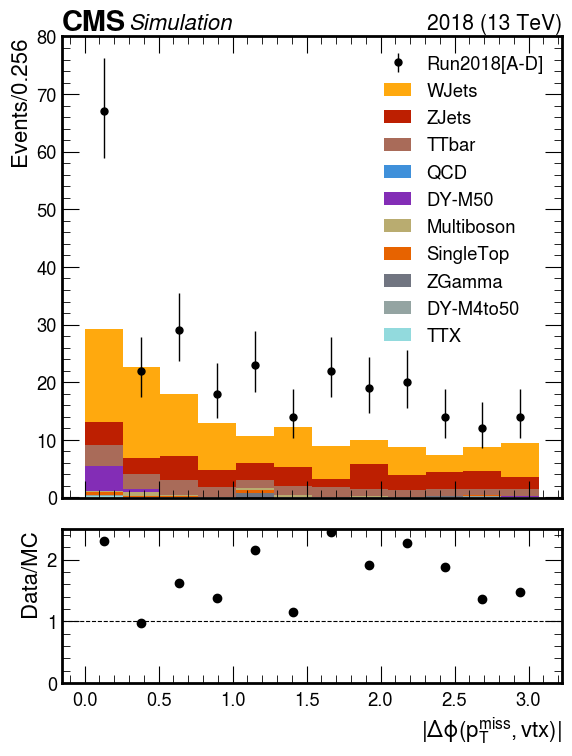

In [16]:
variable = 'sel_vtx_METdPhi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 8j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"|$\Delta\phi(p^{miss}_{T},vtx)$|",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_chi2.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_chi2.png


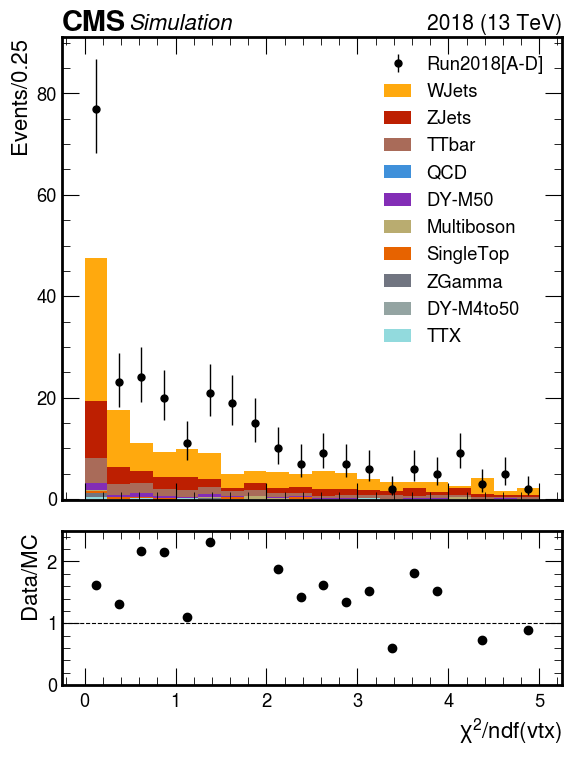

In [17]:
variable = 'sel_vtx_chi2'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\chi^{2}/ndf(vtx)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_pt.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_pt.png


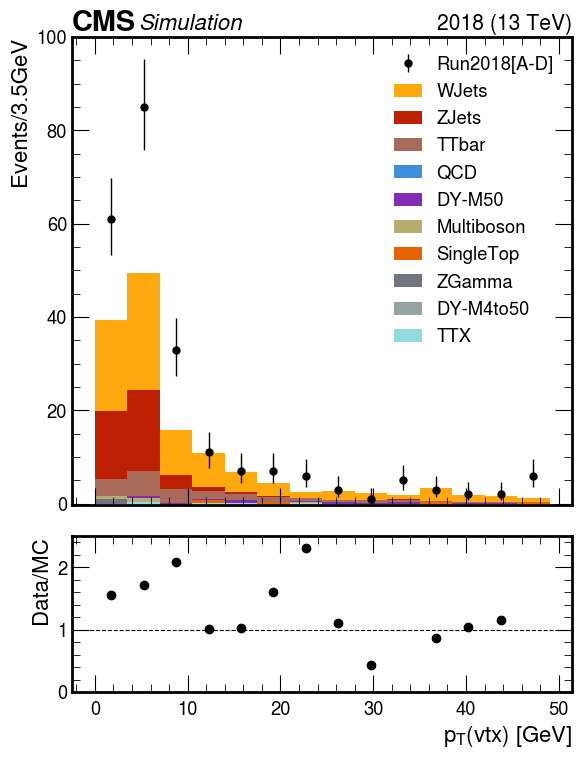

In [18]:
variable = 'sel_vtx_pt'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 7j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p_{T}(vtx)$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/3.5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_eta.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_eta.png


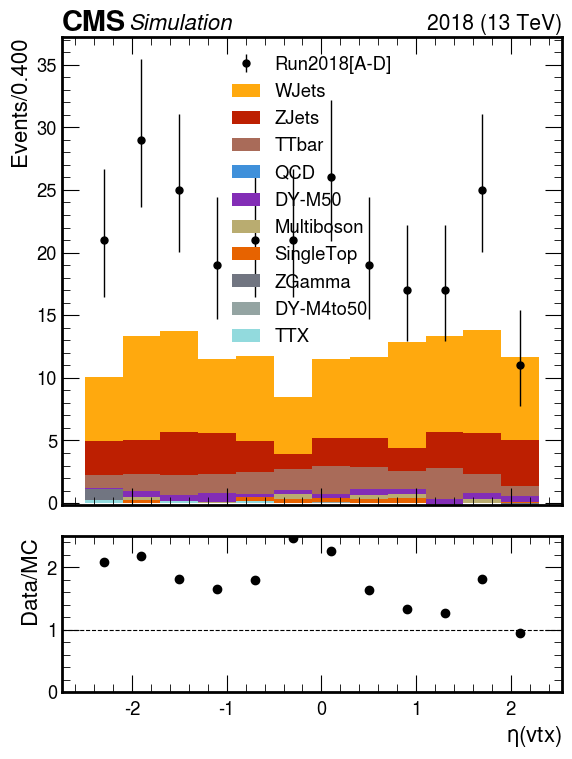

In [21]:
variable = 'sel_vtx_eta'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 8j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\eta(vtx)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_phi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_phi.png


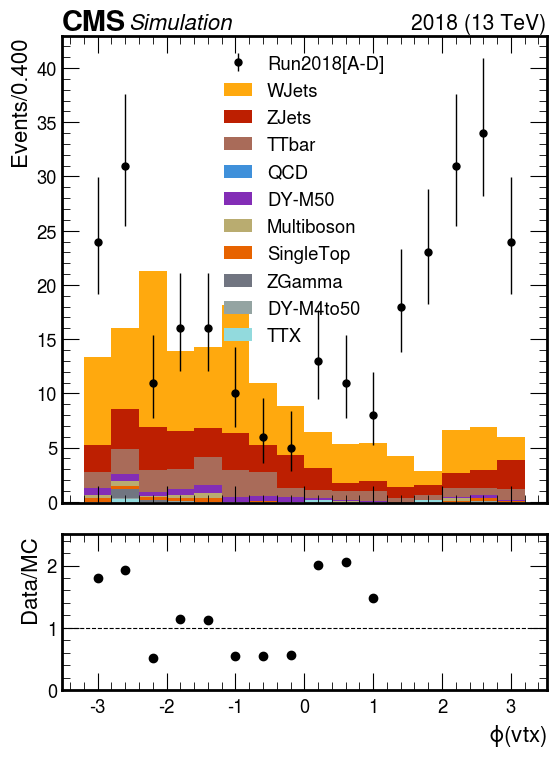

In [24]:
variable = 'sel_vtx_phi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\phi(vtx)$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_type.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_type.png


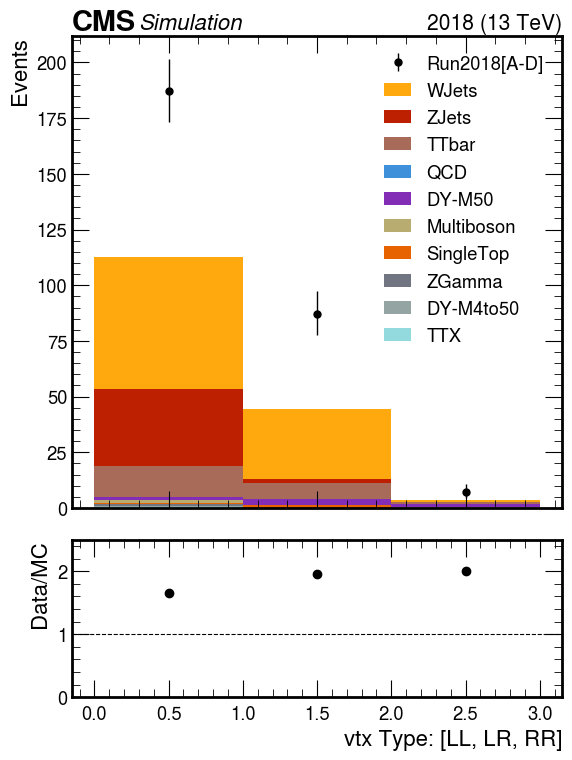

In [25]:
variable = 'sel_vtx_type'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'vtx Type: [LL, LR, RR]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_minEleDrJ.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_minEleDrJ.png


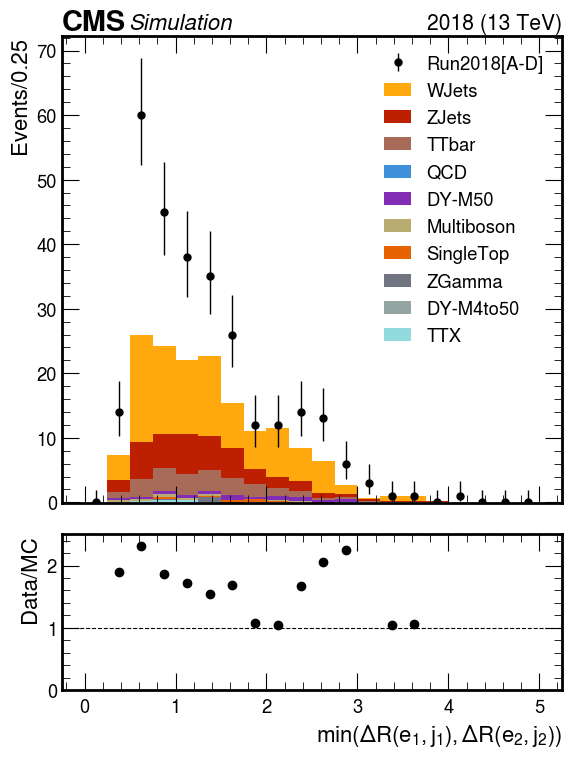

In [26]:
variable = 'sel_vtx_minEleDrJ'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"min($\Delta R(e_{1},j_{1}),\Delta R(e_{2},j_{2}$))",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.25',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_low.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_mindxy_low.png


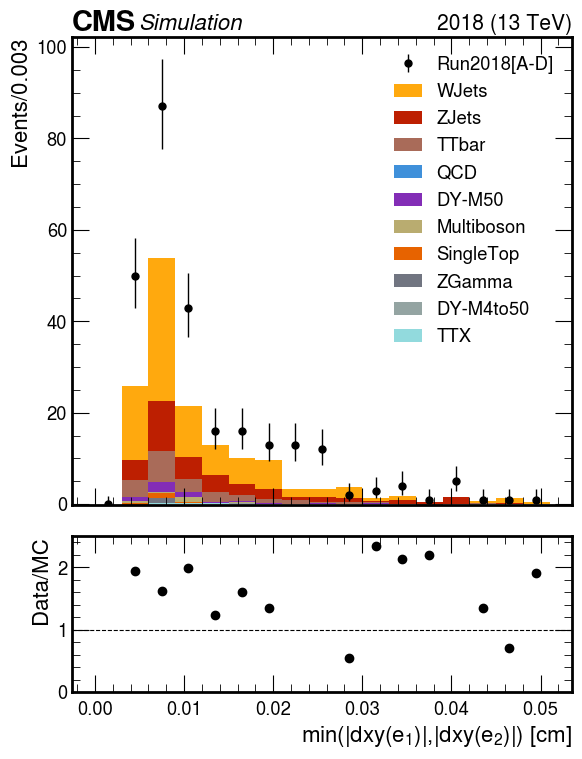

In [29]:
variable = 'sel_vtx_mindxy_low'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 30j,
    'xlim': [0,0.05],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"min(|dxy($e_{1}$)|,|dxy($e_{2}$)|) [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_sign_etaProd.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_sign_etaProd.png


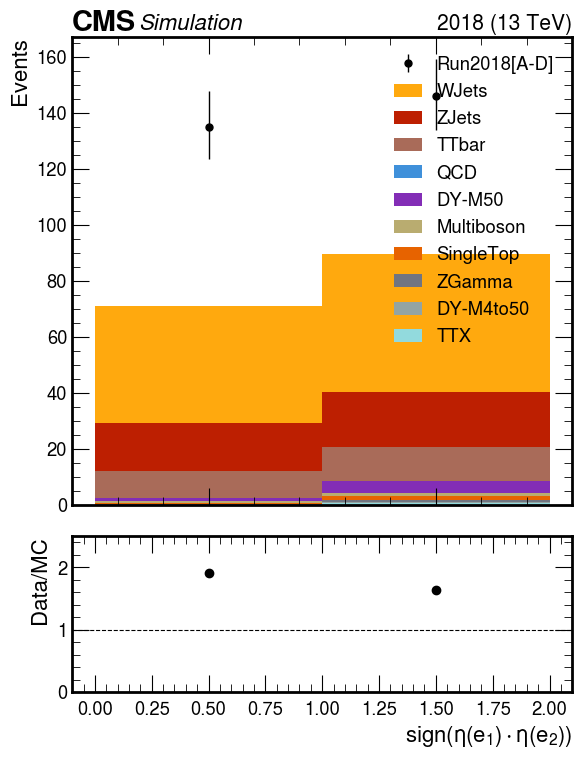

In [30]:
variable = 'sel_vtx_sign_etaProd'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"sign($\eta(e_{1}) \cdot \eta(e_{2})$)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_moreMC.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots/data_bkg/sel_vtx//data_VR_sel_vtx_CosThetaColl_moreMC.png


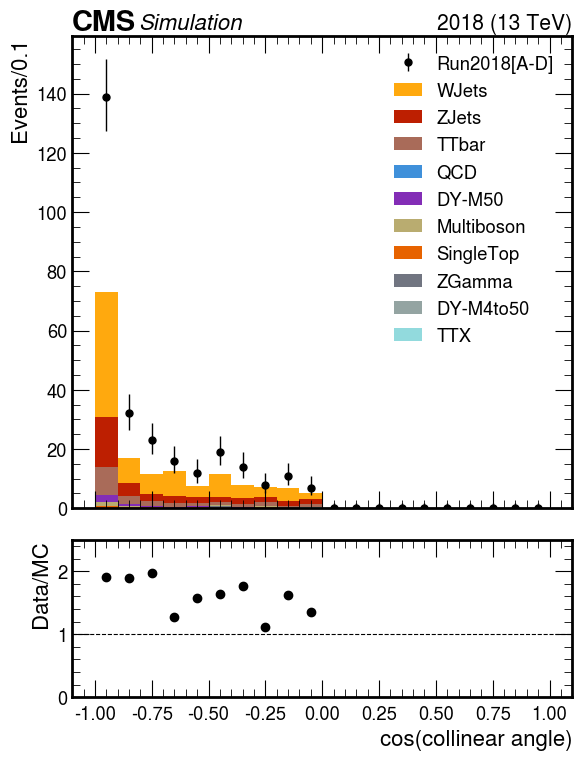

In [31]:
variable = 'sel_vtx_CosThetaColl'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"cos(collinear angle)",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.1',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}_moreMC.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_maxMiniRelIsoCorr.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/sel_vtx//data_VR_sel_vtx_maxMiniRelIsoCorr.png


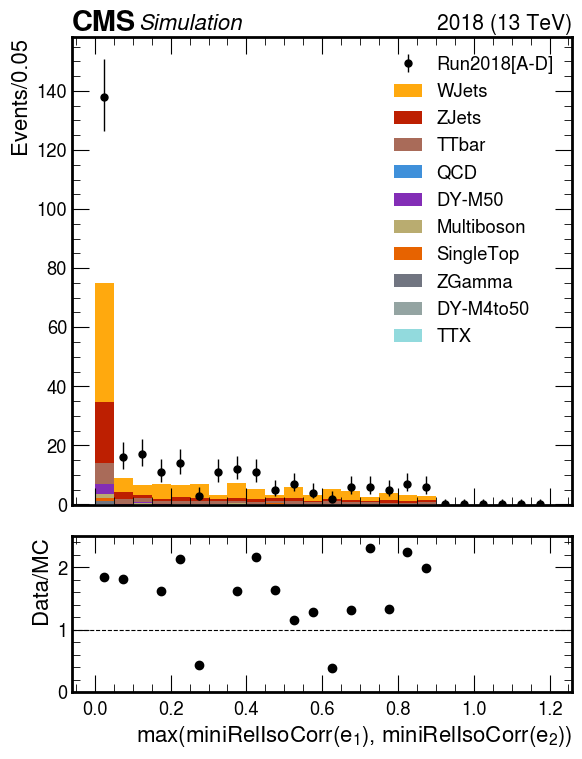

In [32]:
variable = 'sel_vtx_maxMiniRelIsoCorr'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,1.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'max(miniRelIsoCorr($e_{1}$), miniRelIsoCorr($e_{2}$))',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.05',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/sel_vtx/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_PFMET.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_PFMET.png


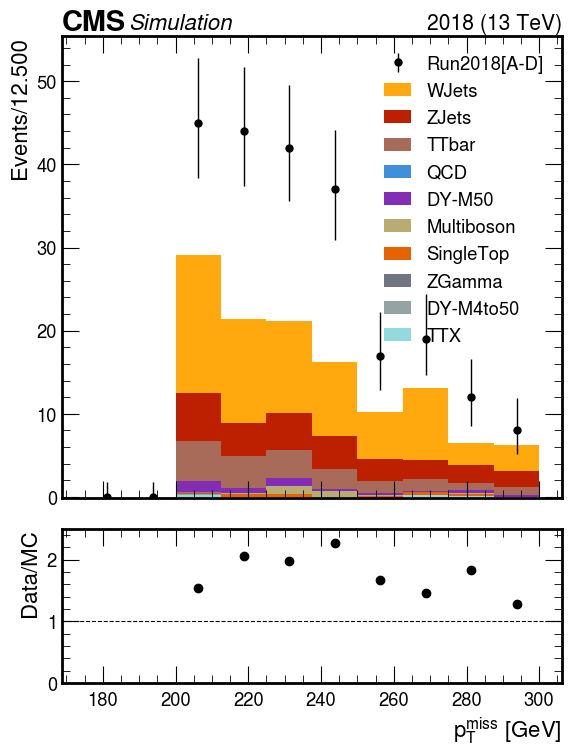

In [35]:
variable = 'PFMET'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 5j,
    'xlim': [180,500],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p^{miss}_{T}$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_PFMET1000.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_PFMET1000.png


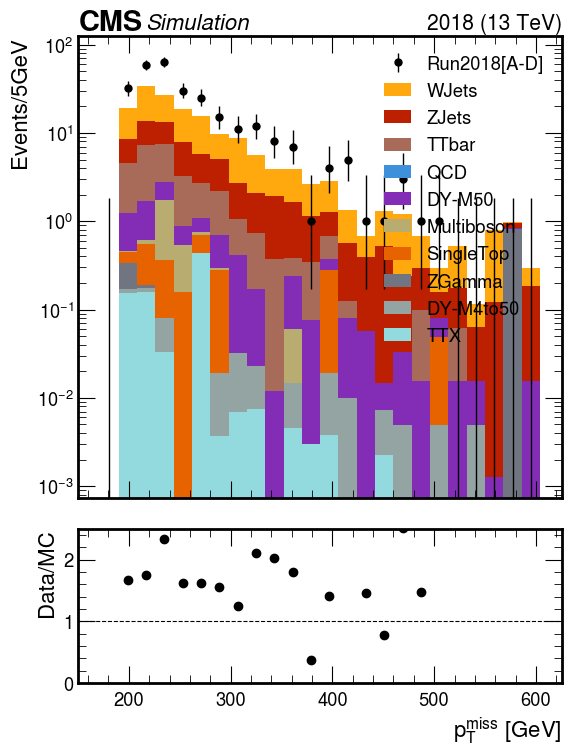

In [36]:
variable = 'PFMET1000'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': [180,600],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p^{miss}_{T}$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/5GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_PFMETphi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_PFMETphi.png


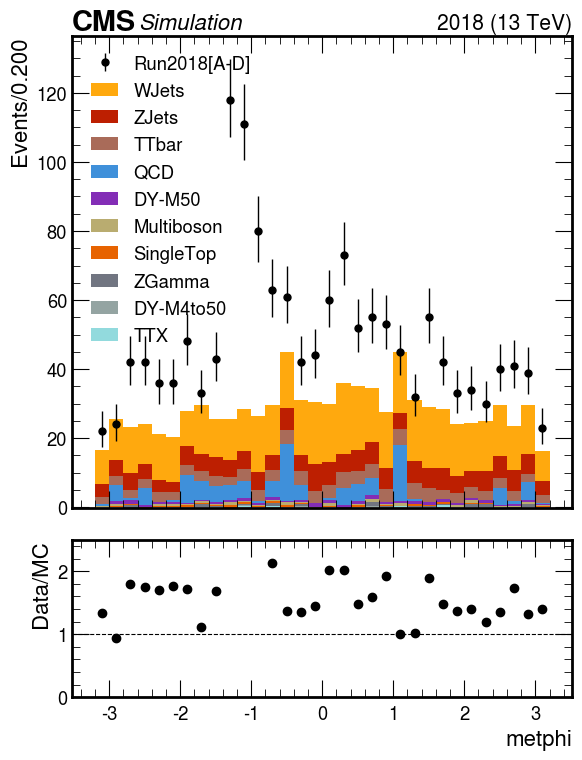

In [38]:
variable = 'PFMETphi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut5',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_PVx.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_PVx.png


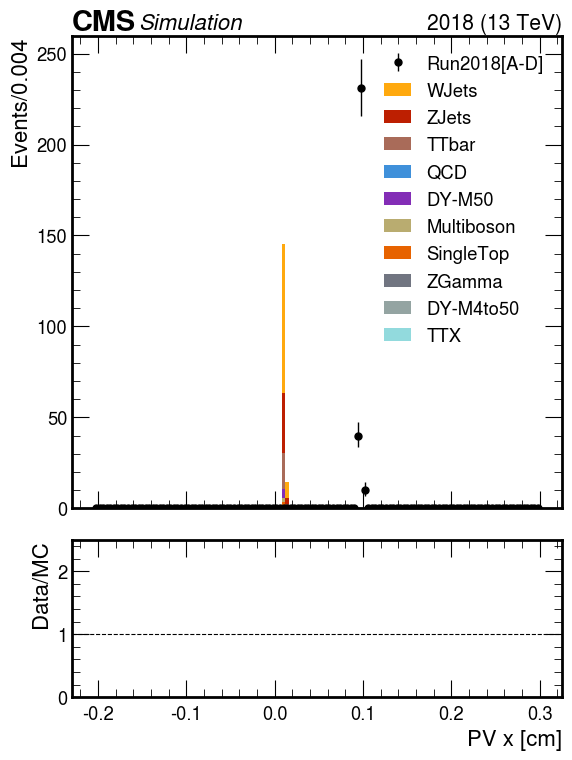

In [39]:
variable = 'PVx'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [-0.2,0.3],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'PV x [cm]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_PVy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_PVy.png


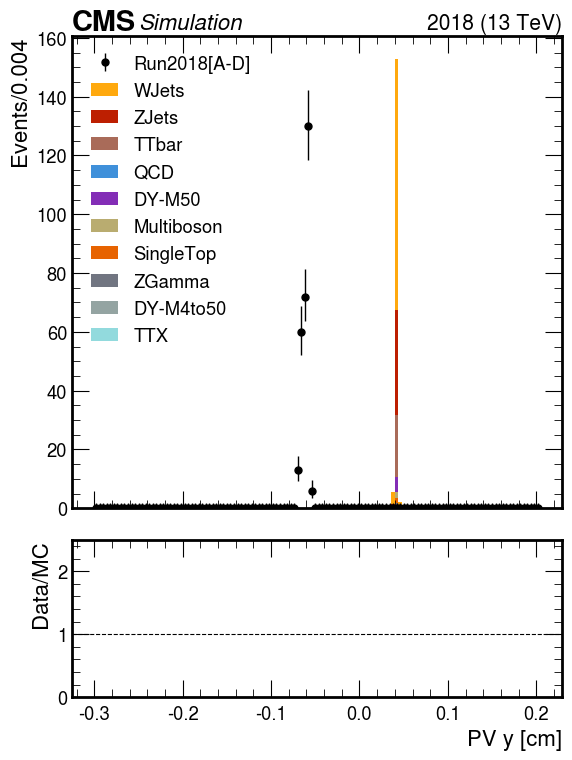

In [40]:
variable = 'PVy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [-0.3, 0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'PV y [cm]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e1_dxy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e1_dxy.png


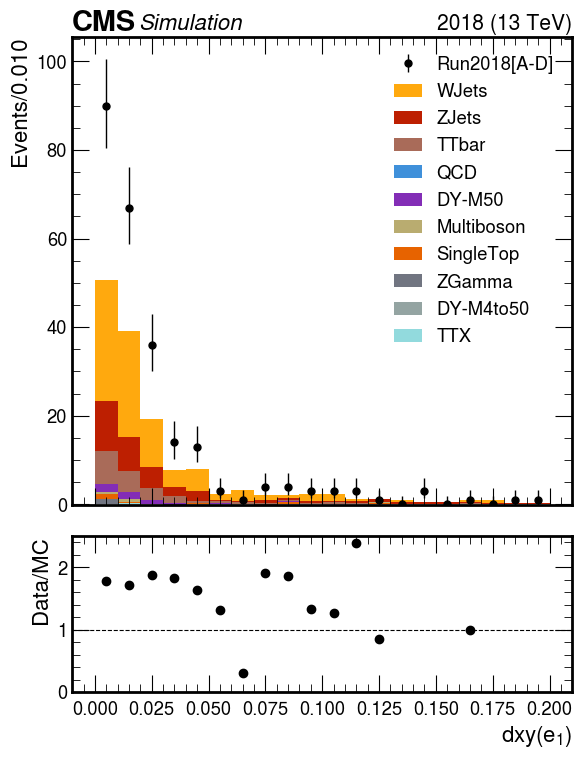

In [41]:
variable = 'sel_e1_dxy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$dxy(e_{1})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e2_dxy.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e2_dxy.png


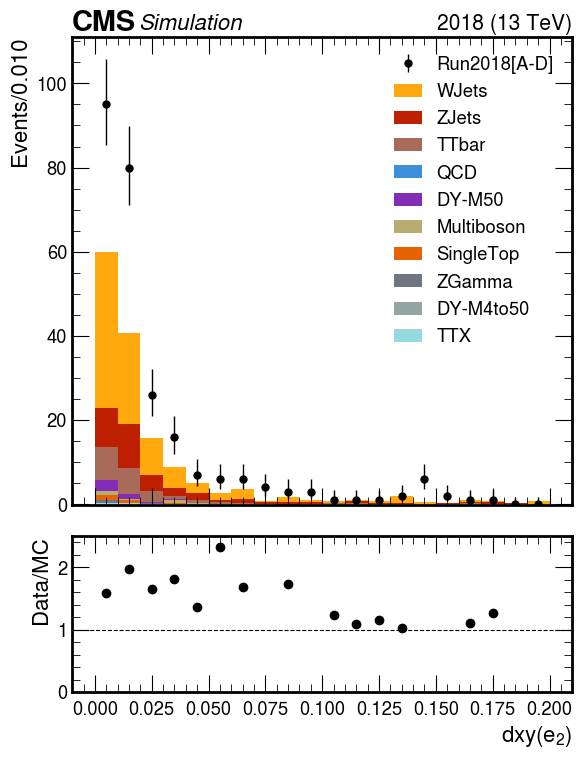

In [42]:
variable = 'sel_e2_dxy'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': [0,0.2],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$dxy(e_{2})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e1_vxy1.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e1_vxy1.png


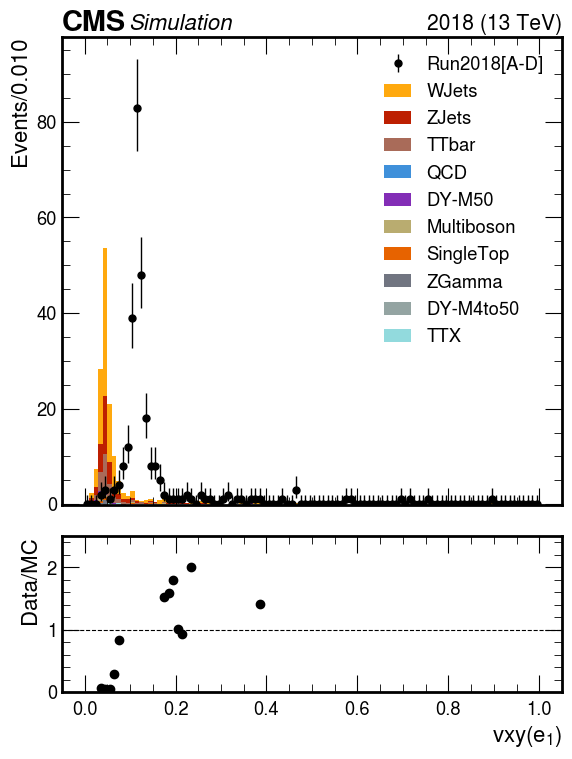

In [43]:
variable = 'sel_e1_vxy1'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vxy(e_{1})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e2_vxy1.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: divide by zero encountered in divide
  ratio = hist_data.values()/hist_bkg.values()
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e2_vxy1.png


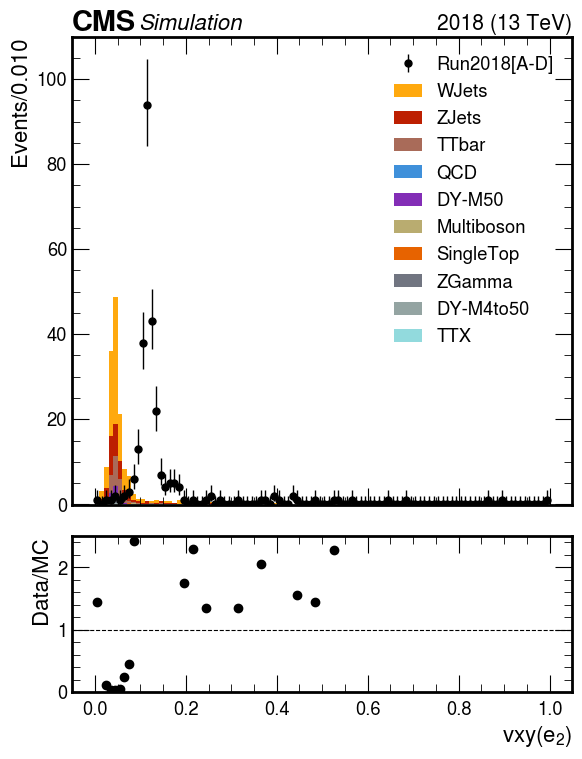

In [44]:
variable = 'sel_e2_vxy1'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vxy(e_{2})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e1_vz.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e1_vz.png


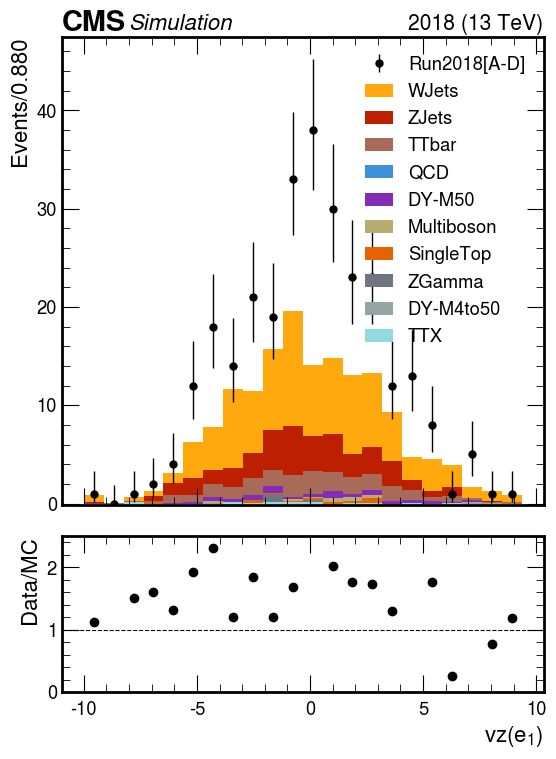

In [48]:
variable = 'sel_e1_vz'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 22j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vz(e_{1})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e2_vz.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_e2_vz.png


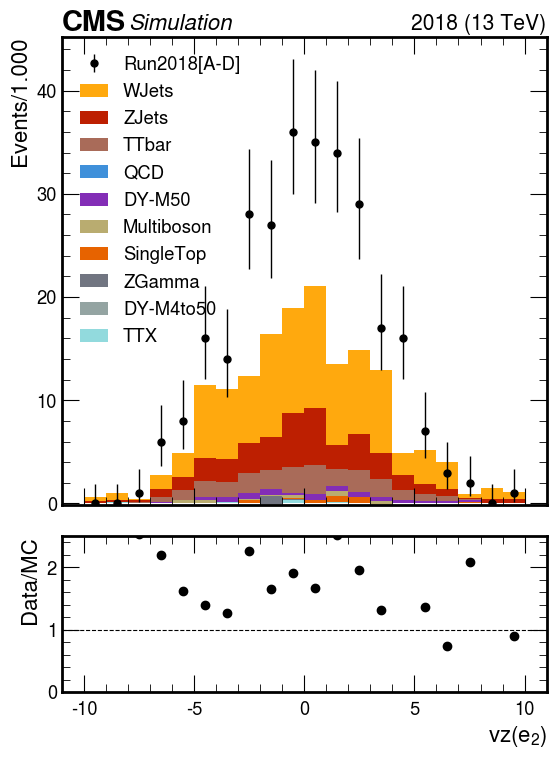

In [50]:
variable = 'sel_e2_vz'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 25j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$vz(e_{2})$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_vtx_mass_low_cut7.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_vtx_mass_low_cut7.png


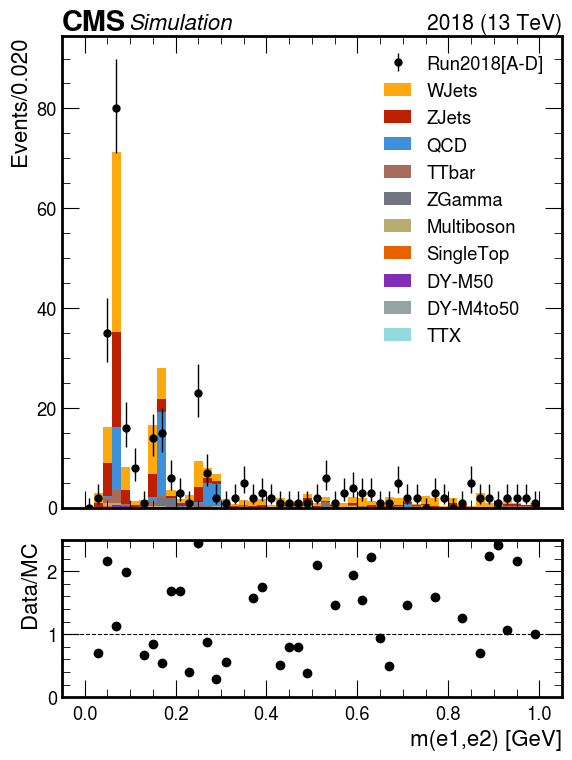

In [68]:
variable = 'sel_vtx_mass_low'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut7',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'm(e1,e2) [GeV]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}_cut7.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_vtx_mass_low_cut9.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_vtx_mass_low_cut9.png


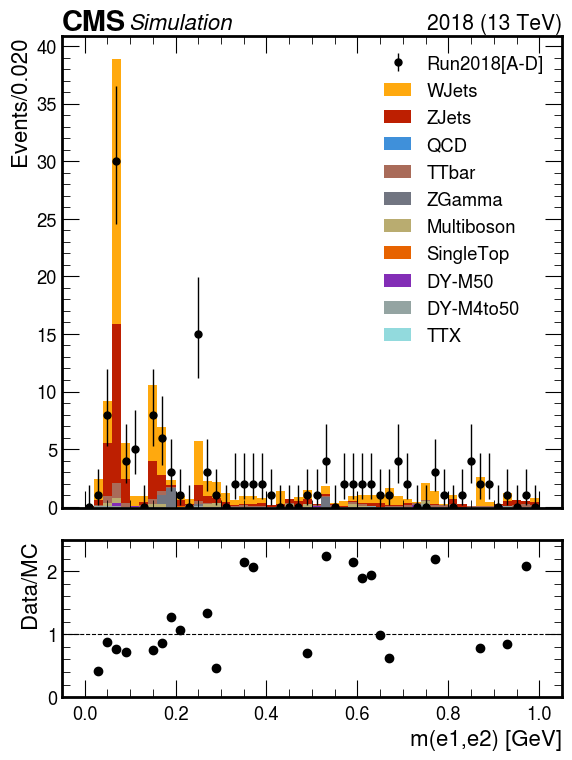

In [69]:
variable = 'sel_vtx_mass_low'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': [0,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': 'm(e1,e2) [GeV]',   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}_cut9.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_vtx_mass_low_ISRcuts.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg//data_VR_sel_vtx_mass_low_ISRcuts.png


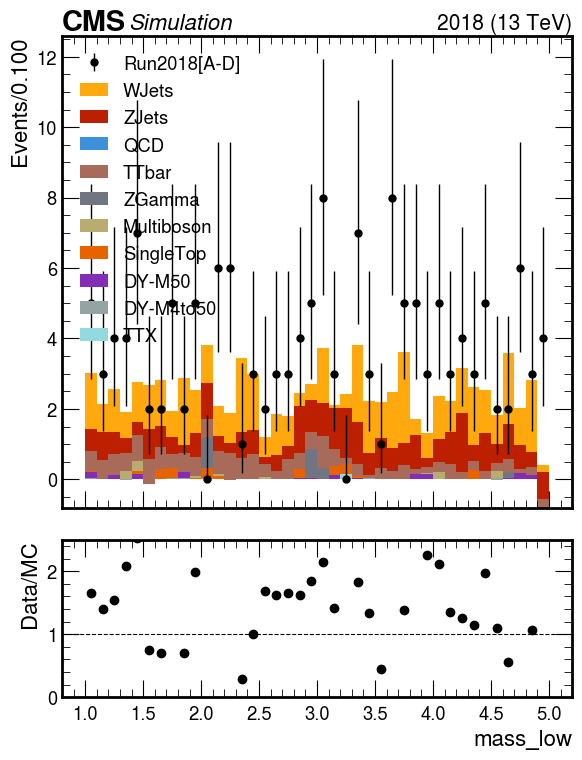

In [62]:
variable = 'sel_vtx_mass_low'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut9',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 10j,
    'xlim': [1,5],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/',
    'outName': f'data_VR_{variable}_ISRcuts.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_jetMETdPhi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_jetMETdPhi.png


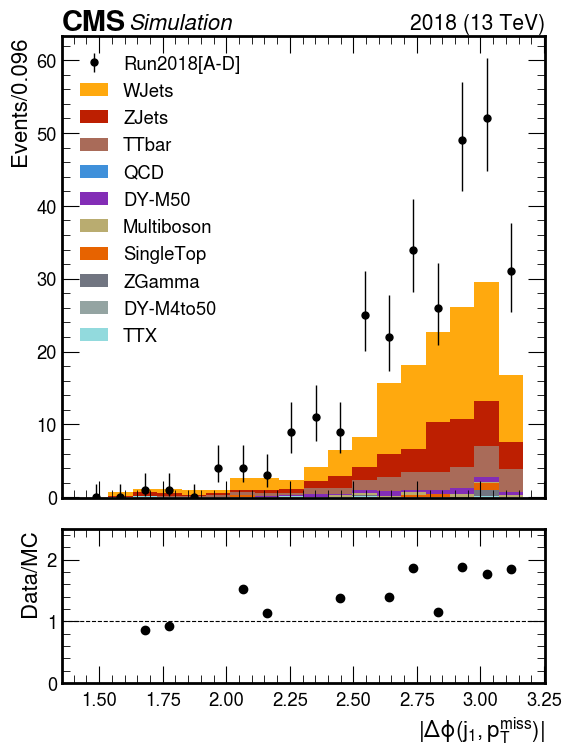

In [70]:
variable = 'jetMETdPhi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': [1.5, 4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"|$\Delta\phi(j_{1}, p^{miss}_{T})$|",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.096',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2//data_VR_minJetMETdPhi.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2//data_VR_minJetMETdPhi.png


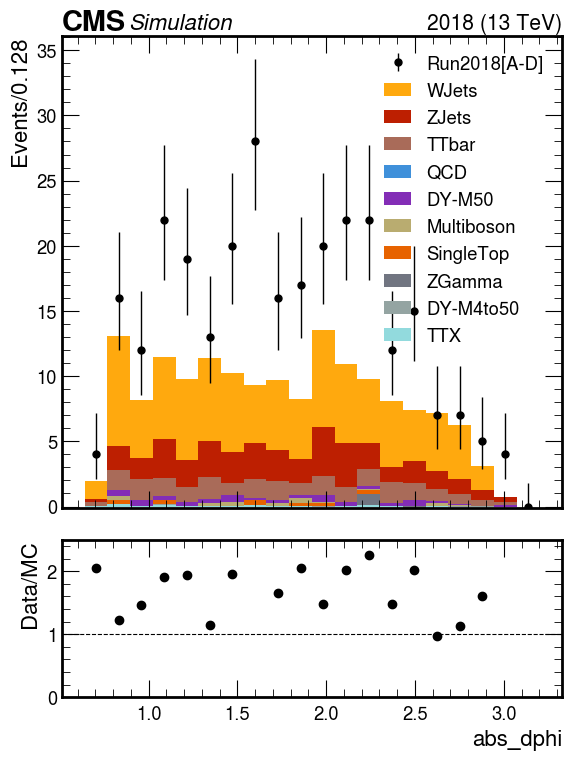

In [71]:
variable = 'minJetMETdPhi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': [0.7, 4],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_lead_jet_pt.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_lead_jet_pt.png


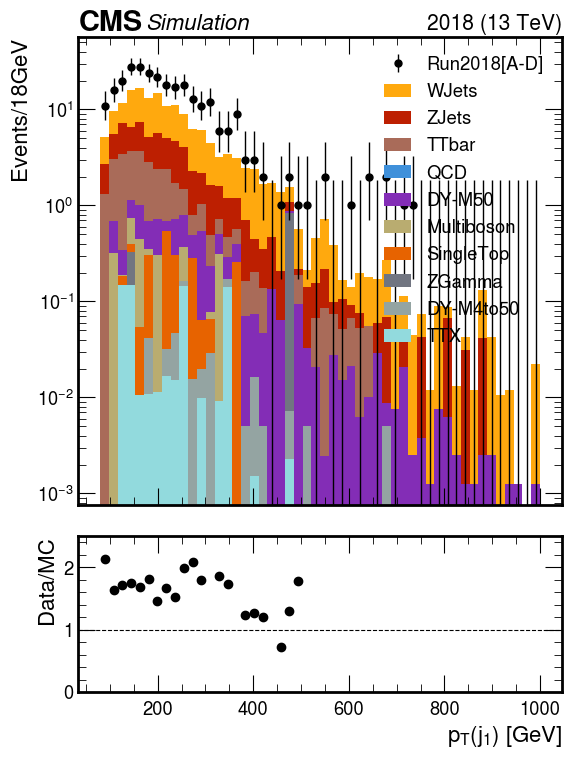

In [74]:
variable = 'lead_jet_pt'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 2j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': True, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$p_{T}(j_{1})$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/18GeV',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots/data_bkg/jetMET//data_VR_lead_jet_eta.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


Saved: ./plots/data_bkg/jetMET//data_VR_lead_jet_eta.png


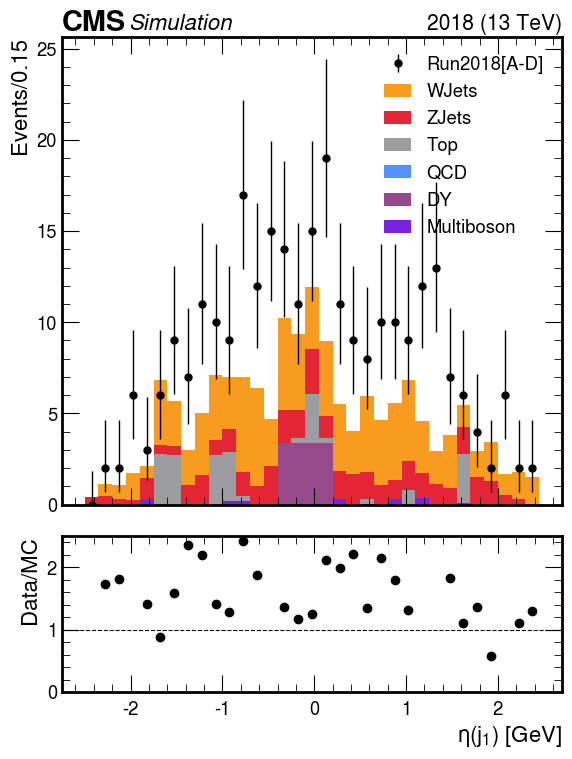

In [53]:
variable = 'lead_jet_eta'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 3j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\eta(j_{1})$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.15',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

In [ ]:
variable = 'lead_jet_phi'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$\eta(j_{1})$ [GeV]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': None,   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_jetMETratio.png


/uscms/home/kyungmip/nobackup/miniconda3/envs/debug/lib/python3.8/site-packages/hist/basehist.py:324: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))
/uscms_data/d3/kyungmip/CMSSW_10_6_26/src/iDMe/python_analysis/studies/VRstudies/../../analysisTools/plotTools.py:1357: RuntimeWarning: invalid value encountered in divide
  ratio = hist_data.values()/hist_bkg.values()


Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2/data_bkg/jetMET//data_VR_jetMETratio.png


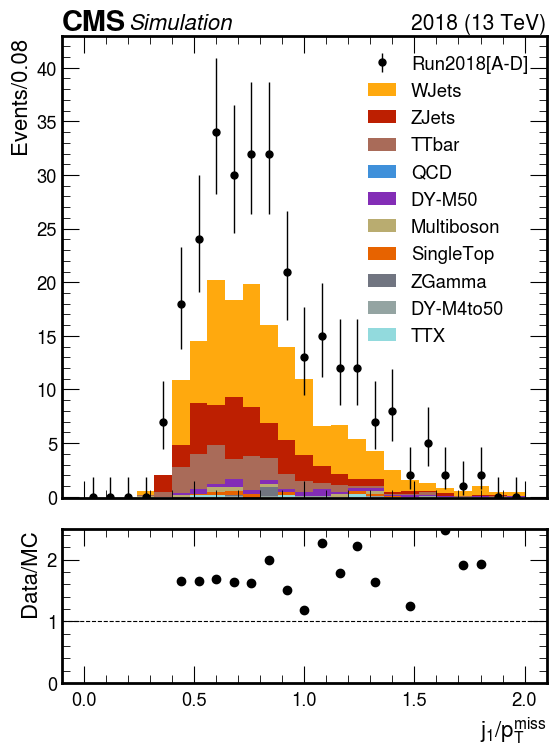

In [75]:
variable = 'jetMETratio'

fig, ax = plt.subplots(figsize=(6,6))

# Plot settings
plot_dict = {
    'variable': variable,
    'cut': 'cut10',
    'year': 2018
}

style_dict = {
    'fig': fig,
    'ax': ax,
    'rebin': 4j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doDensity': False,
    'doYerr': True, 
    'xlabel': r"$j_{1}/p^{miss}_{T}$",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': 'Events/0.08',   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'label': 'Run2018[A-D]',    # if None, the default will show up; otherwise give as a string, i.e. 'Highest ctau signal samples'
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/data_bkg/jetMET/',
    'outName': f'data_VR_{variable}.png'
}

ptools.plot_data_MC_ratio(data_histo, bkg_histo, plot_dict, style_dict)

### Plot 2D -- Background

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2//background_cut7_vx_vs_vy_all.png


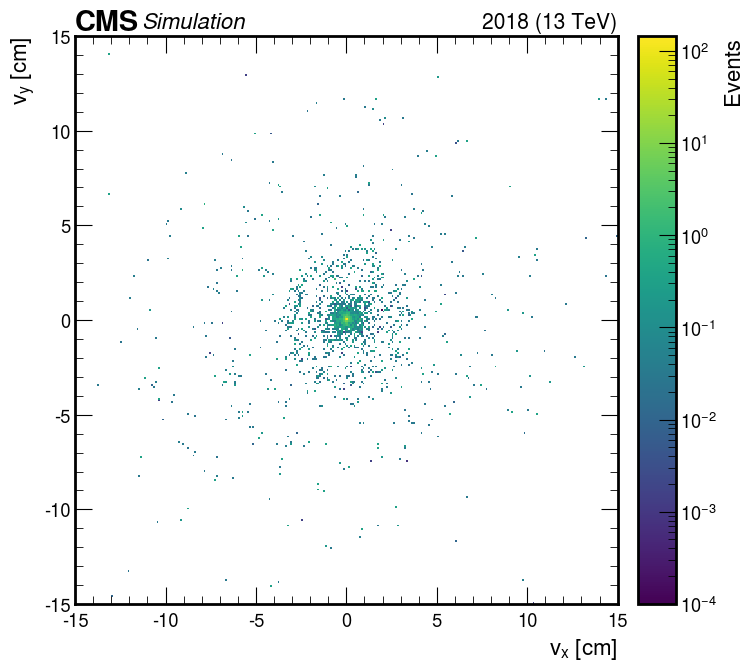

In [76]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/',
    'outName': f'background_cut9_vx_vs_vy_all.png'
}

ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots_VR_collinear_neg_good_vtx_v7_NJetG2//background_cut9_vx_vs_vy_all.png


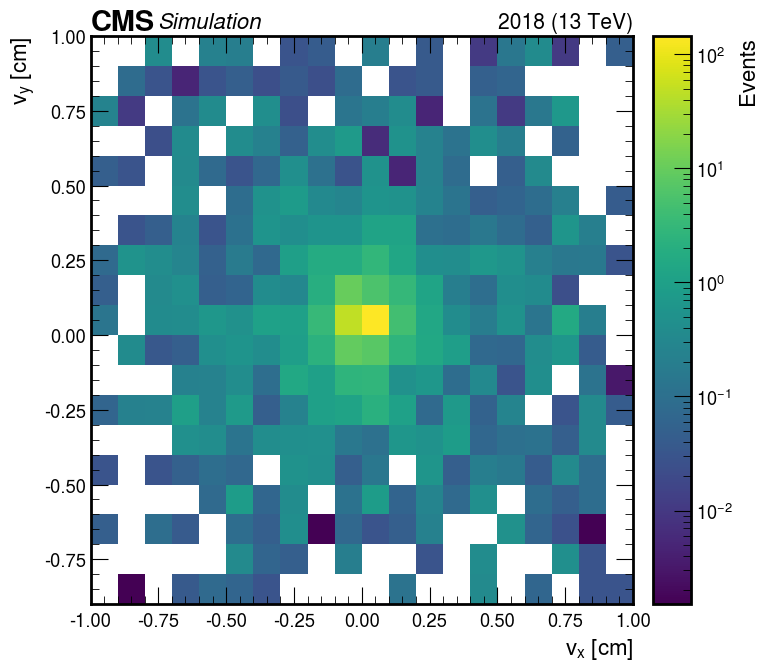

In [78]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': [-1,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': [-1,1],     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': f'./plots{suffix}/',
    'outName': f'background_cut9_vx_vs_vy_all.png'
}

ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = 'all')

Saved: ./plots//background_cut7_vx_vs_vy_WZjets.png


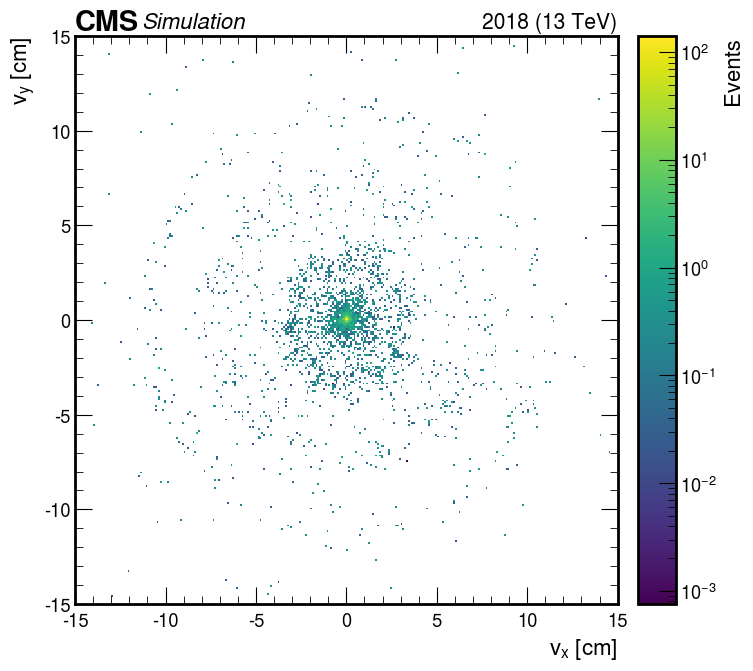

In [107]:
# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'background_cut7_vx_vs_vy_WZjets.png'
}

ptools.plot_bkg_2D(bkg_histo, plot_dict, style_2d_dict, processes = ['WJets', 'ZJets'])

### Plot 2D -- Signal

Saved: ./plots//signal_cut7_vx_vs_vy_m1_30_delta_0.1_ctau_100.png


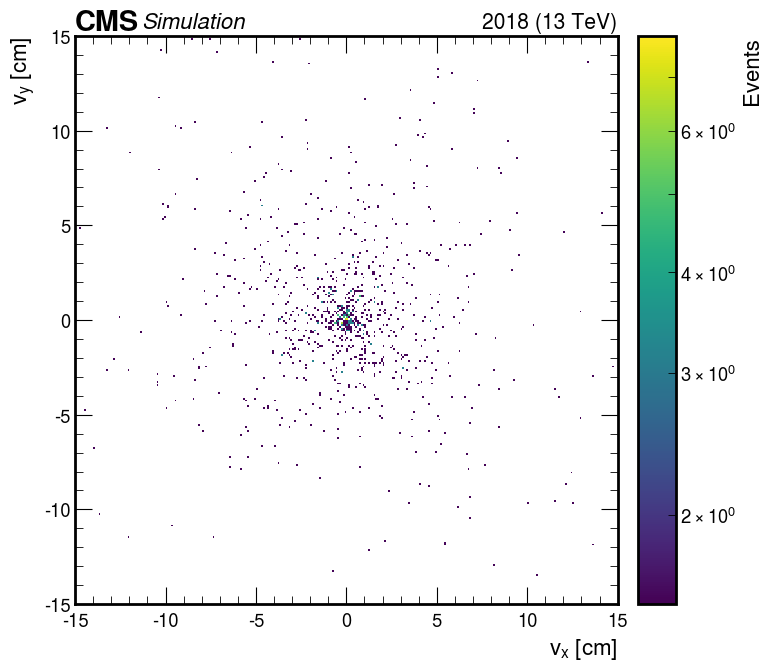

In [113]:
m1 = 30
delta = 0.1
ctau = 100

# Plot settings
fig, ax = plt.subplots(figsize=(7,7))

plot_dict = {
    'variable': 'sel_vtx_vx_vs_vy',
    'cut': 'cut9',
    'year': 2018
}

style_2d_dict = {
    'fig': fig,
    'ax': ax,
    'xrebin': 1j,
    'yrebin': 1j,
    'xlim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]  
    'ylim': None,     # if None, the default will show up; otherwise give as a list, i.e. [0, 10]
    'doLogy': False, 
    'doLogx': False,
    'doLogz': True,
    'xlabel': r"$v_{x}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Electron dxy'
    'ylabel': r"$v_{y}$ [cm]",   # if None, the default will show up; otherwise give as a string, i.e. 'Efficiency'
    'zlabel': 'Events',   
    'flow': None,     # overflow
    'doSave': True,
    'outDir': './plots/',
    'outName': f'signal_cut7_vx_vs_vy_m1_{m1}_delta_{delta}_ctau_{ctau}.png'
}

ptools.plot_signal_2D(sig_histo, m1, delta, ctau, plot_dict, style_2d_dict)